In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
from keras.layers import Dense
from keras.models import Sequential

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [ ]:
stock = yf.Ticker("BRITANNIA.NS")
###What ABOUT STOCK SPLIT

In [ ]:
data = yf.download('BRITANNIA.NS', start='1996-01-01', end='2024-08-13',interval='1d',actions=False)
# df = yf.HistoricalPrices(instrument = "BRITANNIA.NS", start_date="1996-01-01", end_date="2024-08-12", date_format_string='%Y-%m-%d', event='history', frequency='1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-02,10.600000,10.600000,10.600000,10.600000,7.473688,1500
1996-01-03,10.666666,10.666666,10.466666,10.466666,7.379676,3000
1996-01-04,10.466666,10.466666,10.466666,10.466666,7.379676,0
1996-01-05,10.666666,10.666666,10.466666,10.473333,7.384377,6000
1996-01-08,10.333333,10.533333,10.333333,10.533333,7.426678,3000


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-02,10.600000,10.600000,10.600000,10.600000,7.473688,1500
1996-01-03,10.666666,10.666666,10.466666,10.466666,7.379676,3000
1996-01-04,10.466666,10.466666,10.466666,10.466666,7.379676,0
1996-01-05,10.666666,10.666666,10.466666,10.473333,7.384377,6000
1996-01-08,10.333333,10.533333,10.333333,10.533333,7.426678,3000
...,...,...,...,...,...,...
2024-08-06,5724.549805,5921.000000,5710.149902,5854.500000,5854.500000,727869
2024-08-07,5890.200195,5924.799805,5809.049805,5836.799805,5836.799805,314935
2024-08-08,5844.750000,5861.950195,5725.000000,5744.649902,5744.649902,271628


In [ ]:
data.count()

,0
Open,7187
High,7187
Low,7187
Close,7187
Adj Close,7187
Volume,7187


In [ ]:
df = data['Close']

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-06,5724.549805,5921.000000,5710.149902,5854.500000,5854.500000,727869
2024-08-07,5890.200195,5924.799805,5809.049805,5836.799805,5836.799805,314935
2024-08-08,5844.750000,5861.950195,5725.000000,5744.649902,5744.649902,271628
2024-08-09,5770.399902,5785.549805,5720.000000,5740.299805,5740.299805,232215
2024-08-12,5745.000000,5774.500000,5625.000000,5645.750000,5645.750000,622193


In [ ]:
df.head()

,Close
0,10.600000
1,10.466666
2,10.466666
3,10.473333
4,10.533333


In [ ]:
df.drop(['Date'],axis=1,inplace=True)

In [ ]:
df = df.reset_index()

In [ ]:
df.tail()

,Date,Close
7182,2024-08-06,5854.500000
7183,2024-08-07,5836.799805
7184,2024-08-08,5744.649902
7185,2024-08-09,5740.299805
7186,2024-08-12,5645.750000


<Axes: xlabel='Close', ylabel='Count'>

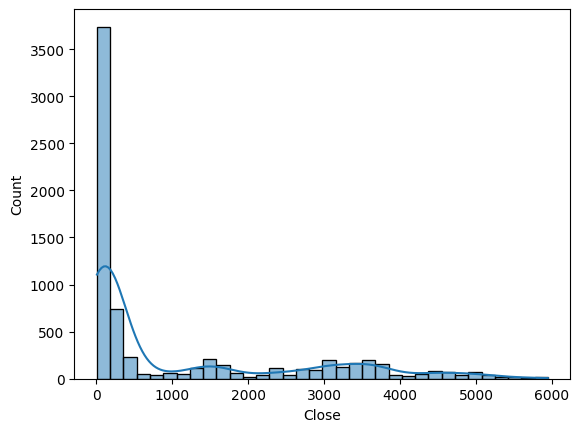

In [ ]:
sns.histplot(df['Close'],kde=True)

In [ ]:
mm = MinMaxScaler()

In [ ]:
df = mm.fit_transform(df)

In [ ]:
print(df)

[[1.90948620e-04]
 [1.68483953e-04]
 [1.68483953e-04]
 ...
 [9.66286344e-01]
 [9.65553423e-01]
 [9.49623298e-01]]


In [ ]:
print(df[-1])

[0.9496233]


In [ ]:
x =[]
y=[]

for i in range(60,len(df)):
    z=[]
    for j in range(i-60,i):
        z.append(df[j][0])
    x.append(z)
    y.append(df[i][0])

In [ ]:
print(x)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(len(y))

7127


In [ ]:
print(len(x))

7127


In [ ]:
print(type(x))

<class 'list'>


In [ ]:
print(type(y))

<class 'list'>


In [ ]:
model = Sequential()
model.add(Dense(762,activation='relu'))
model.add(Dense(762,activation='relu'))
model.add(Dense(762,activation='relu'))
model.add(Dense(762,activation='relu'))
model.add(Dense(762,activation='relu'))
model.add(Dense(1,activation='linear'))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
m = np.array(x)
n = np.array(y)

In [ ]:
print(len(m))
print(len(n))

7127
7127


In [ ]:
print(type(m))
print(type(n))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(m)

[[1.90948620e-04 1.68483953e-04 1.68483953e-04 ... 6.62703560e-04
  6.62703560e-04 6.52032880e-04]
 [1.68483953e-04 1.68483953e-04 1.69607259e-04 ... 6.62703560e-04
  6.52032880e-04 6.29568374e-04]
 [1.68483953e-04 1.69607259e-04 1.79716206e-04 ... 6.52032880e-04
  6.29568374e-04 6.51471307e-04]
 ...
 [8.62820332e-01 8.64547293e-01 8.51607758e-01 ... 9.58409720e-01
  9.84794323e-01 9.81812124e-01]
 [8.64547293e-01 8.51607758e-01 8.64033450e-01 ... 9.84794323e-01
  9.81812124e-01 9.66286344e-01]
 [8.51607758e-01 8.64033450e-01 8.55449159e-01 ... 9.81812124e-01
  9.66286344e-01 9.65553423e-01]]


In [ ]:
model.fit(m,n,epochs=100)

Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 0.0099
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 3.7352e-04
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 1.8318e-04
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 6.7016e-04
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 1.5878e-04
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 2.0800e-04
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 1.8000e-04
Epoch 8/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 1.4036e-04
Epoch 9/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 1.8719e-04
Epoch 10/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 1.3053e-04
Epoch 11/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 1.3333e-04
Epoch 12/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 1.4728e-04
Epoch 13/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 1.1723e-04
Epoch 14/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 10s 3

In [ ]:
df[-60:-1]

array([[0.86403345],
       [0.85544916],
       [0.87083179],
       [0.88587738],
       [0.88819403],
       [0.88137891],
       [0.8765855 ],
       [0.88303841],
       [0.87954236],
       [0.87427724],
       [0.87111817],
       [0.86909636],
       [0.89559893],
       [0.92281748],
       [0.91503358],
       [0.91892549],
       [0.92311233],
       [0.92805735],
       [0.91483975],
       [0.90475605],
       [0.90714848],
       [0.90751917],
       [0.90158851],
       [0.90458757],
       [0.896475  ],
       [0.89099088],
       [0.90013953],
       [0.9118745 ],
       [0.9133234 ],
       [0.9209473 ],
       [0.92110739],
       [0.90849635],
       [0.91649095],
       [0.91264107],
       [0.93295178],
       [0.9366163 ],
       [0.95351529],
       [0.9681228 ],
       [0.96909159],
       [0.97343005],
       [0.97724628],
       [0.98611694],
       [0.98765855],
       [0.9887453 ],
       [0.99041328],
       [1.        ],
       [0.98058222],
       [0.980

In [ ]:
test = mm.inverse_transform(r[-1].reshape(-1,1))

In [ ]:
test

array([[5740.29980469]])

In [ ]:
r = df[-61:-1]

In [ ]:
print(len(r))

60


In [ ]:
print(r)

[[0.85160776]
 [0.86403345]
 [0.85544916]
 [0.87083179]
 [0.88587738]
 [0.88819403]
 [0.88137891]
 [0.8765855 ]
 [0.88303841]
 [0.87954236]
 [0.87427724]
 [0.87111817]
 [0.86909636]
 [0.89559893]
 [0.92281748]
 [0.91503358]
 [0.91892549]
 [0.92311233]
 [0.92805735]
 [0.91483975]
 [0.90475605]
 [0.90714848]
 [0.90751917]
 [0.90158851]
 [0.90458757]
 [0.896475  ]
 [0.89099088]
 [0.90013953]
 [0.9118745 ]
 [0.9133234 ]
 [0.9209473 ]
 [0.92110739]
 [0.90849635]
 [0.91649095]
 [0.91264107]
 [0.93295178]
 [0.9366163 ]
 [0.95351529]
 [0.9681228 ]
 [0.96909159]
 [0.97343005]
 [0.97724628]
 [0.98611694]
 [0.98765855]
 [0.9887453 ]
 [0.99041328]
 [1.        ]
 [0.98058222]
 [0.98059909]
 [0.98787755]
 [0.992056  ]
 [0.982722  ]
 [0.97299206]
 [0.96384333]
 [0.96219222]
 [0.95840972]
 [0.98479432]
 [0.98181212]
 [0.96628634]
 [0.96555342]]


In [ ]:
type(r)

numpy.ndarray

In [ ]:
pred=  model.predict(np.array(r).reshape(1,-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [ ]:
print(pred)

[[0.96435094]]


In [ ]:
ans = mm.inverse_transform(pred)

In [ ]:
print(ans)

[[5733.1626]]
